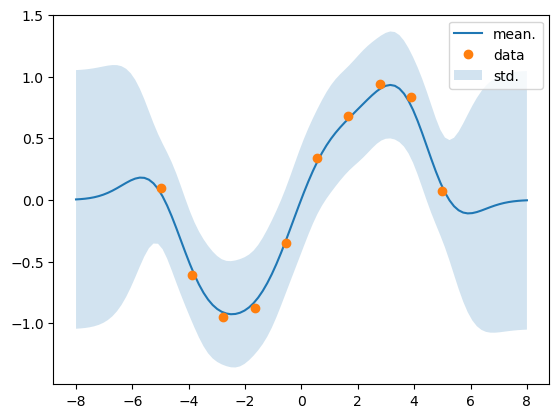

PyObject <matplotlib.legend.Legend object at 0x7f9e2018b310>

In [5]:
# Train dataset
Xᵗ = range(-5, 5, length=10)
Yᵗ = sin.(2pi*Xᵗ ./10) + 0.1*randn(10)

# Test dataset
Xᵖ = range(-8, 8, length=100)

# Model
θ₁, θ₂, θ₃ = (1.0, 1.0, 0.1)
k(x₁, x₂) = θ₁*exp(-0.5*inv(θ₂^2)*(x₁ - x₂)^2) + θ₃*(x₁==x₂) # Gaussian kernel

# Training
invKᵗᵗ = inv(k.(Xᵗ, Xᵗ'))

# Prediction
Kᵖᵖ, Kᵖᵗ = (k.(Xᵖ, Xᵖ'), k.(Xᵖ, Xᵗ'))
μᵖ, Σᵖ = (Kᵖᵗ*invKᵗᵗ*Yᵗ, Kᵖᵖ - Kᵖᵗ*invKᵗᵗ*Kᵖᵗ')

# Plot
using PyPlot, LinearAlgebra
plot(Xᵖ, μᵖ, label="mean.")
fill_between(Xᵖ, μᵖ+sqrt.(diag(Σᵖ)), μᵖ-sqrt.(diag(Σᵖ)),
             label="std.", alpha=0.2)
plot(Xᵗ, Yᵗ, "o", label="data")
legend()

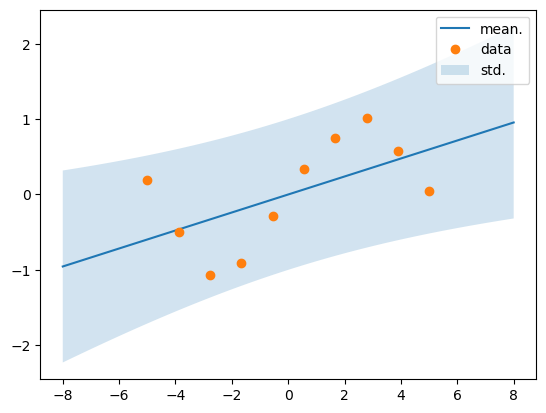

PyObject <matplotlib.legend.Legend object at 0x7f9e801d3280>

In [12]:
# Train dataset
Xᵗ = range(-5, 5, length=10)
Yᵗ = sin.(2pi*Xᵗ ./10) + 0.1*randn(10)

# Test dataset
Xᵖ = range(-8, 8, length=100)

# Model
θ₁ = (1.0)
k(x₁, x₂) = dot(x₁, x₂) + θ₁*(x₁==x₂) # Linear kernel

# Training
invKᵗᵗ = inv(k.(Xᵗ, Xᵗ'))

# Prediction
Kᵖᵖ, Kᵖᵗ = (k.(Xᵖ, Xᵖ'), k.(Xᵖ, Xᵗ'))
μᵖ, Σᵖ = (Kᵖᵗ*invKᵗᵗ*Yᵗ, Kᵖᵖ - Kᵖᵗ*invKᵗᵗ*Kᵖᵗ')

# Plot
using PyPlot, LinearAlgebra
plot(Xᵖ, μᵖ, label="mean.")
fill_between(Xᵖ, μᵖ+sqrt.(diag(Σᵖ)), μᵖ-sqrt.(diag(Σᵖ)),
             label="std.", alpha=0.2)
plot(Xᵗ, Yᵗ, "o", label="data")
legend()

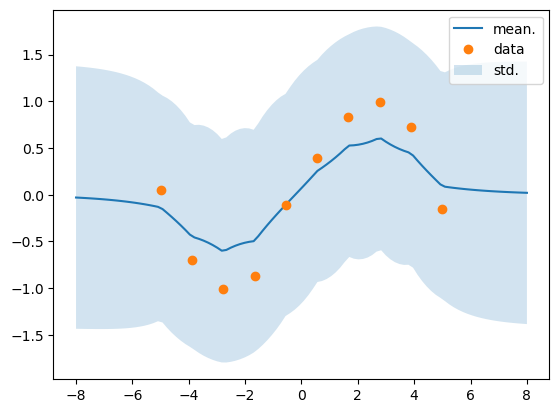

PyObject <matplotlib.legend.Legend object at 0x7f9e50ca0640>

In [15]:
# Train dataset
Xᵗ = range(-5, 5, length=10)
Yᵗ = sin.(2pi*Xᵗ ./10) + 0.1*randn(10)

# Test dataset
Xᵖ = range(-8, 8, length=100)

# Model
θ₁, θ₂, θ₃ = (1.0, 1.0, 0.1)
k(x₁, x₂) = exp(-0.5*inv(θ₁)*abs.(x₁ - x₂)) + θ₂*(x₁==x₂)  # Exponential kernel

# Training
invKᵗᵗ = inv(k.(Xᵗ, Xᵗ'))

# Prediction
Kᵖᵖ, Kᵖᵗ = (k.(Xᵖ, Xᵖ'), k.(Xᵖ, Xᵗ'))
μᵖ, Σᵖ = (Kᵖᵗ*invKᵗᵗ*Yᵗ, Kᵖᵖ - Kᵖᵗ*invKᵗᵗ*Kᵖᵗ')

# Plot
using PyPlot, LinearAlgebra
plot(Xᵖ, μᵖ, label="mean.")
fill_between(Xᵖ, μᵖ+sqrt.(diag(Σᵖ)), μᵖ-sqrt.(diag(Σᵖ)),
             label="std.", alpha=0.2)
plot(Xᵗ, Yᵗ, "o", label="data")
legend()

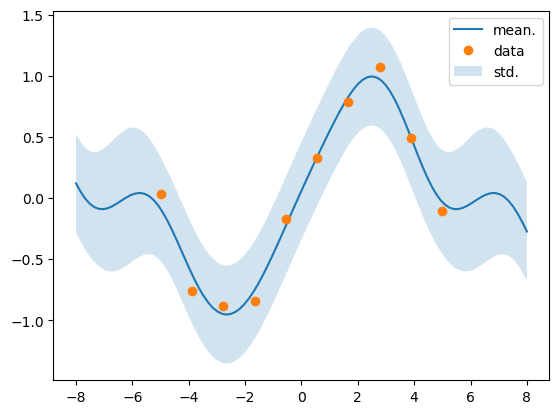

PyObject <matplotlib.legend.Legend object at 0x7f9e610c8730>

In [17]:
# Train dataset
Xᵗ = range(-5, 5, length=10)
Yᵗ = sin.(2pi*Xᵗ ./10) + 0.1*randn(10)

# Test dataset
Xᵖ = range(-8, 8, length=100)

# Model
θ₁, θ₂, θ₃ = (1.0, 1.0, 0.1)
k(x₁, x₂) = exp(θ₁*cos(0.5*inv(θ₂)*abs.(x₁ - x₂))) + θ₃*(x₁==x₂)  # Periodic kernel

# Training
invKᵗᵗ = inv(k.(Xᵗ, Xᵗ'))

# Prediction
Kᵖᵖ, Kᵖᵗ = (k.(Xᵖ, Xᵖ'), k.(Xᵖ, Xᵗ'))
μᵖ, Σᵖ = (Kᵖᵗ*invKᵗᵗ*Yᵗ, Kᵖᵖ - Kᵖᵗ*invKᵗᵗ*Kᵖᵗ')

# Plot
using PyPlot, LinearAlgebra
plot(Xᵖ, μᵖ, label="mean.")
fill_between(Xᵖ, μᵖ+sqrt.(diag(Σᵖ)), μᵖ-sqrt.(diag(Σᵖ)),
             label="std.", alpha=0.2)
plot(Xᵗ, Yᵗ, "o", label="data")
legend()

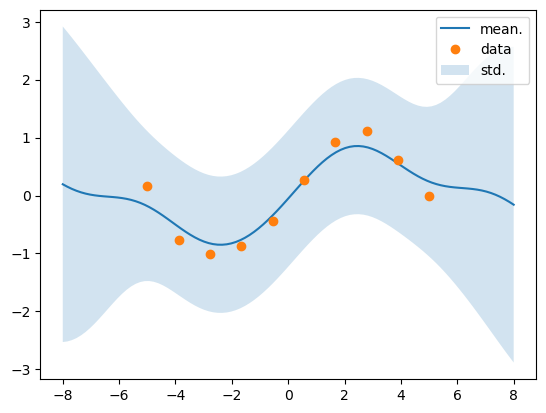

PyObject <matplotlib.legend.Legend object at 0x7f9e6127a9a0>

In [19]:
# Train dataset
Xᵗ = range(-5, 5, length=10)
Yᵗ = sin.(2pi*Xᵗ ./10) + 0.1*randn(10)

# Test dataset
Xᵖ = range(-8, 8, length=100)

# Model
θ₁, θ₂, θ₃, θ₄, θ₅ = (1.0, 1.0, 1.0, 1.0, 1.0)
k(x₁, x₂) = θ₁*dot(x₁, x₂) + θ₂*exp(θ₃*cos(0.5*inv(θ₄)*abs.(x₁ - x₂))) + θ₅*(x₁==x₂) # Linear kernel + Periodic kernel

# Training
invKᵗᵗ = inv(k.(Xᵗ, Xᵗ'))

# Prediction
Kᵖᵖ, Kᵖᵗ = (k.(Xᵖ, Xᵖ'), k.(Xᵖ, Xᵗ'))
μᵖ, Σᵖ = (Kᵖᵗ*invKᵗᵗ*Yᵗ, Kᵖᵖ - Kᵖᵗ*invKᵗᵗ*Kᵖᵗ')

# Plot
using PyPlot, LinearAlgebra
plot(Xᵖ, μᵖ, label="mean.")
fill_between(Xᵖ, μᵖ+sqrt.(diag(Σᵖ)), μᵖ-sqrt.(diag(Σᵖ)),
             label="std.", alpha=0.2)
plot(Xᵗ, Yᵗ, "o", label="data")
legend()